In [22]:
import pandas as pd #Tratamento do csv
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols #Criação da Anova
from statsmodels.stats.multicomp import MultiComparison #Tukey

In [2]:
tratamento = pd.read_csv('anova.csv',sep=';')

AxesSubplot(0.1,0.15;0.8x0.75)


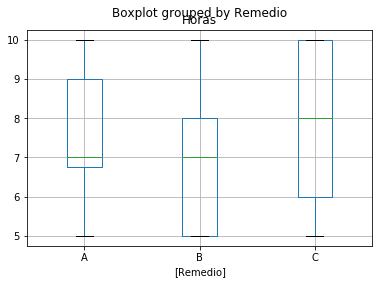

In [5]:
print(tratamento.boxplot(by = 'Remedio'))

In [16]:
modelo1 = ols('Horas ~ Remedio',data=tratamento).fit() #modelo de regressão

In [17]:
resultados1 = sm.stats.anova_lm(modelo1) #anova do modelo

In [18]:
resultados1 #p-value > alfa

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [19]:
modelo2 = ols('Horas ~Remedio * Sexo',data=tratamento).fit()

In [20]:
resultados2 = sm.stats.anova_lm(modelo2) #anova do modelo

In [21]:
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [23]:
mc = MultiComparison(tratamento['Horas'],tratamento['Remedio'])

In [24]:
resultadoteste = mc.tukeyhsd()

In [25]:
print(resultadoteste)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B     -0.625  -3.0803 1.8303 False 
  A      C     0.375   -2.0803 2.8303 False 
  B      C      1.0    -1.4553 3.4553 False 
--------------------------------------------


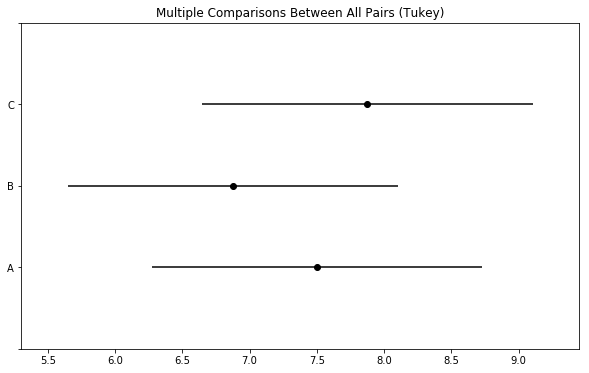

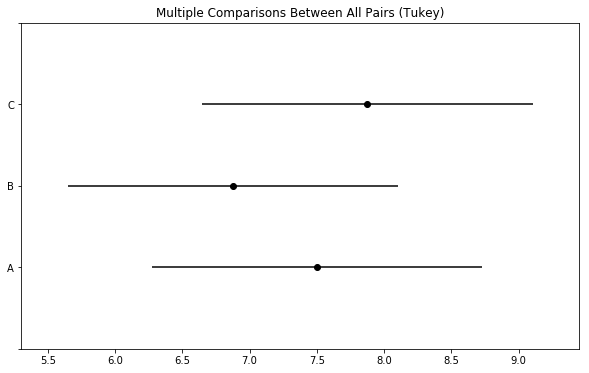

In [26]:
resultadoteste.plot_simultaneous()